# Logistic Regression with Python

This Notebook is a first draft at my attempt at the Totanic Dataset.

Data can be found here: [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). 

QUESTION:
Try to predict a classification- survival or deceased.
Begin understanding of implementing Logistic Regression in Python for classification.

Use a "semi-cleaned" version of the titanic data set, using the data set hosted directly on Kaggle, mean you'd need to do some additional cleaning not shown in this notebook.

Full explantion and maths of Logistic Regression in: Introduction to Statistical Learning, by Gareth James, et al. Sections 4-4.3

Logistic regression <-> binary classification <-> supervised learning

1. [Import Python Libraries](#t1.) 
2. [Exploratory Data Analysis](#t2.)
    * 2.1. [Missing Data](#t2.1.)
3. [Data Cleaning](#t3.) 
    * 3.1. [Converting Categorical Features](#t3.1.)
4. [Building a Logistic Regression Model](#t4.)  
    * 4.1. [Train Test Split](#t4.1.) 
    * 4.2. [Training and Predicting](#t4.2.)
    * 4.3. [Evaluation](#t4.3.) 
5. [Future Work. TODO](#t5.)  

<a id="t1."></a>
## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

%matplotlib inline

>> The Data: Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [2]:
train = pd.read_csv('C:/Users/kevin/OneDrive/Upskill_Puthon_DS/Py_DS_ML_Bootcamp-master/Refactored_Py_DS_ML_Bootcamp-master/13-Logistic-Regression/titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a id="t2."></a>
## 2. Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

<a id="t2.1."></a>
## 2.1. Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [5]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

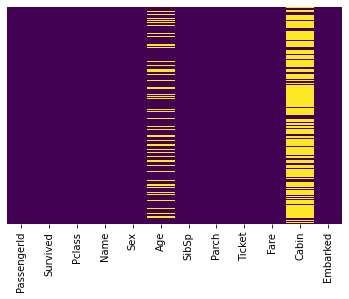

In [6]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference.

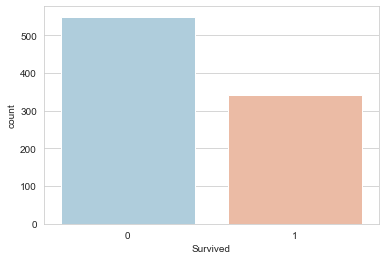

In [17]:
sns.set_style('whitegrid')
ax = sns.countplot(x='Survived', data=train, palette='RdBu_r')


<AxesSubplot:xlabel='Survived', ylabel='count'>

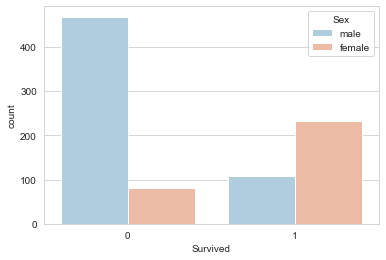

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train, palette='RdBu_r')

>> It seems that males were most likely to not survive comapred to females

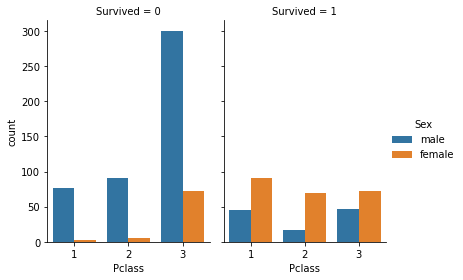

In [3]:
g = sns.catplot(x='Pclass', hue='Sex', col='Survived',
                data=train, kind='count',
                height=4, aspect=.7);

<AxesSubplot:xlabel='Survived', ylabel='count'>

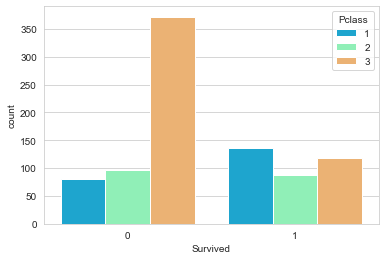

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

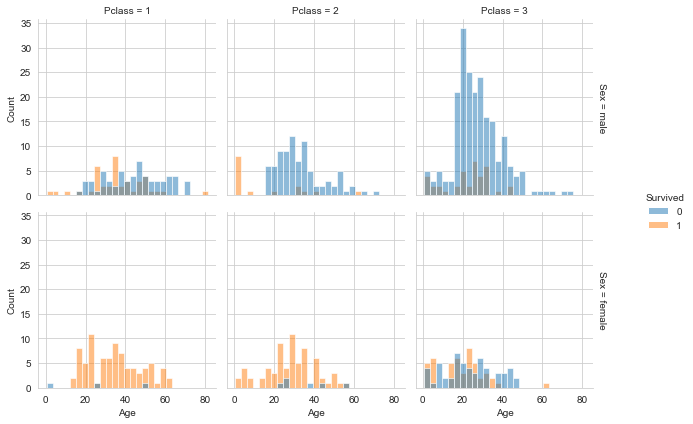

In [73]:
bins = np.arange(0, 80, 5)
sns.displot(
    train, x="Age", col="Pclass", row="Sex", hue='Survived',
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

c:\Users\kevin\anaconda3\envs\MyCourseEnvKP\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

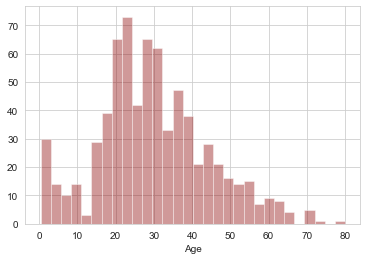

In [20]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

>> Seems to be bimodal - skewed to younger age at begnining and then normalises around 30 years

* Now look at the ticket purchase prices - most ticket prices are distributed towards the lower/cheaper end. Most pasengers are in the cheaper 3rd class

<AxesSubplot:>

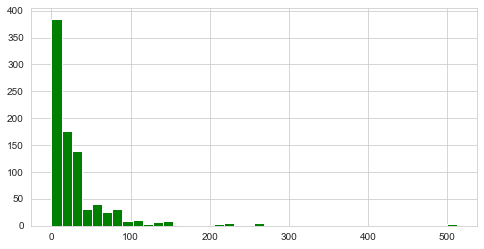

In [21]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

### Swarm and Violin plots
Although the following swarm and violin plots show the same data like the countplots or distplots before,
they can reveal ceratin details that disappear in other plots. However, it takes more time to study these plots in detail.

In [35]:
cm_surv = ["darkgrey" , "lightgreen"]

c:\Users\kevin\anaconda3\envs\MyCourseEnvKP\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

13.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



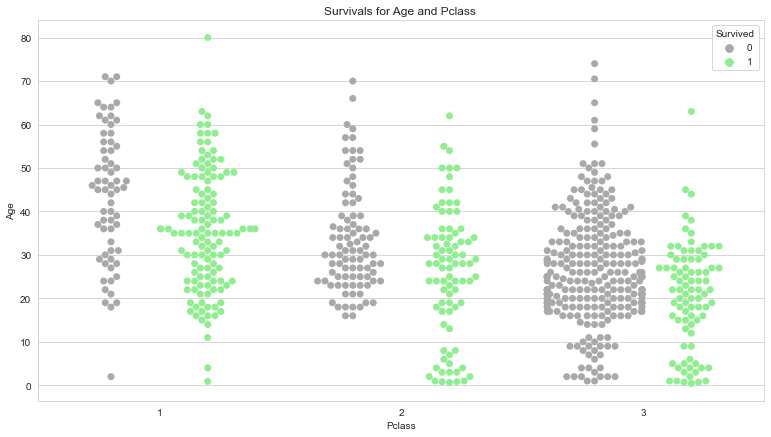

In [44]:
fig, ax = plt.subplots(figsize=(13,7))
sns.swarmplot(x='Pclass', y='Age', hue='Survived', dodge=True, data=train , palette=cm_surv, size=7, ax=ax)
plt.title('Survivals for Age and Pclass ')
plt.show()

Let's now combine the age, the fare and the survival on a single chart.



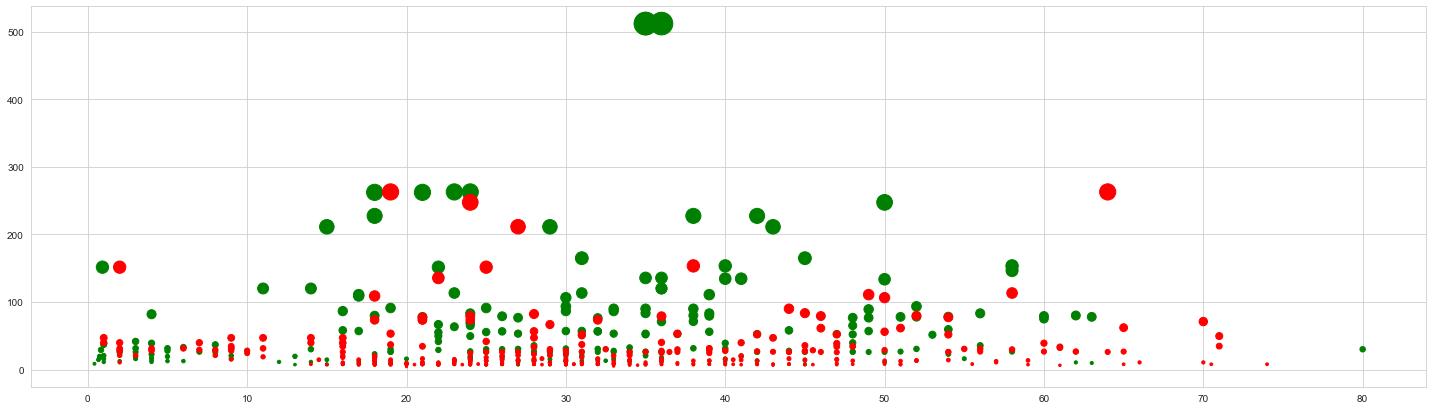

In [91]:
plt.figure(figsize=(25, 7))
ax = plt.subplot()

ax.scatter(train[train['Survived'] == 1]['Age'], train[train['Survived'] == 1]['Fare'],
           c='green', s=train[train['Survived'] == 1]['Fare'])
ax.scatter(train[train['Survived'] == 0]['Age'], train[train['Survived'] == 0]['Fare'], 
           c='red', s=train[train['Survived'] == 0]['Fare']);

The size of the circles is proportional to the ticket fare.

On the x-axis, we have the ages and the y-axis, we consider the ticket fare.

We can observe different clusters:

Large green dots between x=20 and x=45: adults with the largest ticket fares
Small red dots between x=10 and x=45, adults from lower classes on the boat
Small greed dots between x=0 and x=7: these are the children that were saved

c:\Users\kevin\anaconda3\envs\MyCourseEnvKP\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

6.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



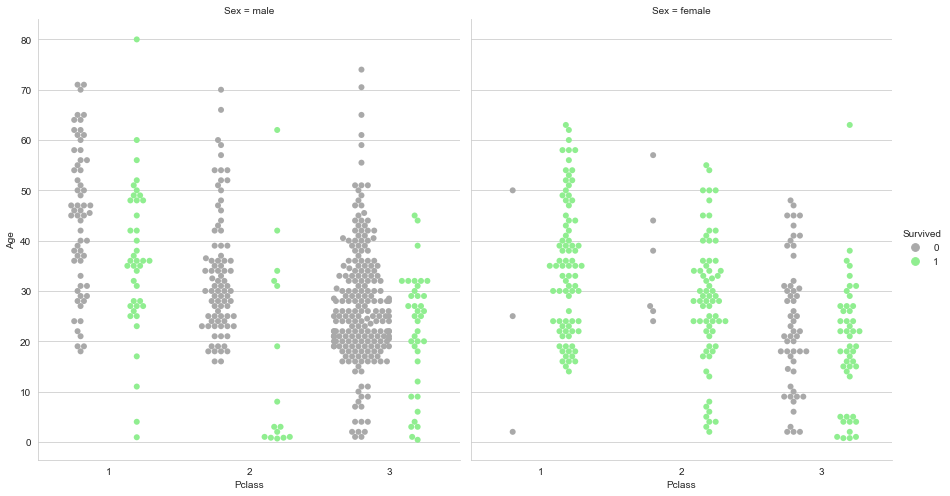

In [90]:
g = sns.catplot(x="Pclass", y="Age", hue="Survived", col="Sex", data=train, kind="swarm", dodge=True, palette=cm_surv, height=7, aspect=.9, s=6)

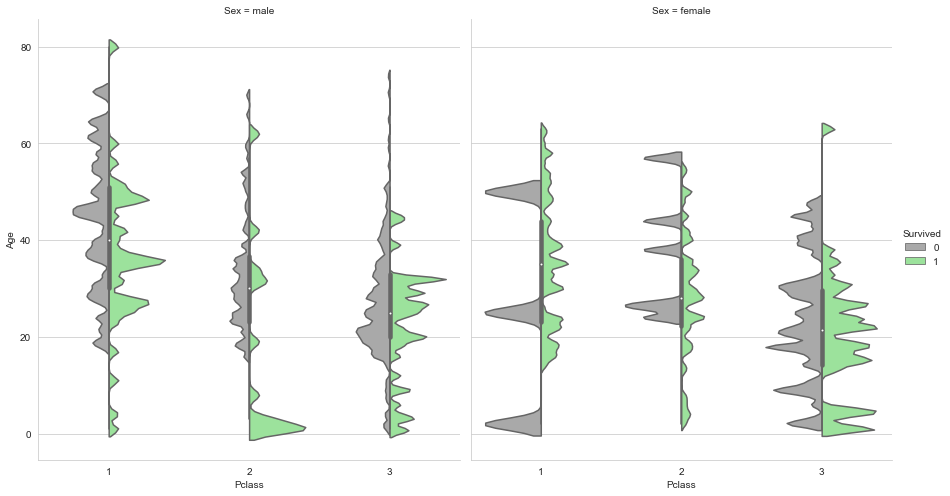

In [47]:
g = sns.catplot(x="Pclass", y="Age", hue="Survived", col="Sex", data=train, kind="violin", split=True, bw=0.05, palette=cm_surv, height=7, aspect=.9, s=7)

c:\Users\kevin\anaconda3\envs\MyCourseEnvKP\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

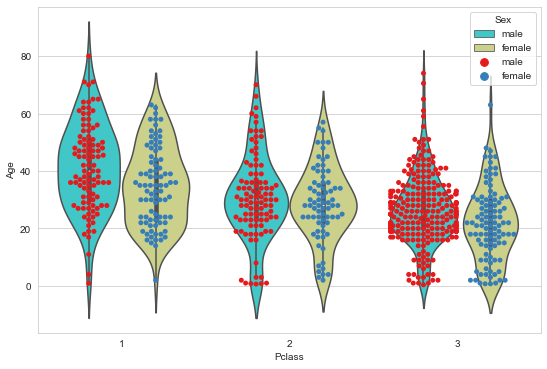

In [64]:
plt.figure(figsize=(9, 6))
sns.violinplot(x='Pclass',y='Age',data=train,hue='Sex',palette='rainbow',dodge=True)
sns.swarmplot(x='Pclass',y='Age',data=train,hue='Sex',palette='Set1',dodge=True)

<AxesSubplot:>

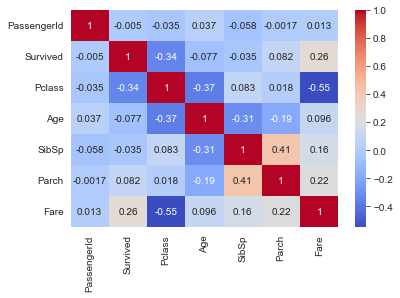

In [77]:
sns.heatmap(train.corr(),cmap='coolwarm',annot=True)

____
### Cufflinks for plots
___
 Let's take a quick moment to show an example of cufflinks!

In [22]:
import cufflinks as cf
cf.go_offline()

In [ ]:
train['Fare'].iplot(kind='hist',bins=30,color='green')

___

<a id="t3."></a>
## 3. Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:

>> NOTE: Could create a model that predicts age based off all the features. But for now, I'll go ahead and use this simple imputation by computing the average age

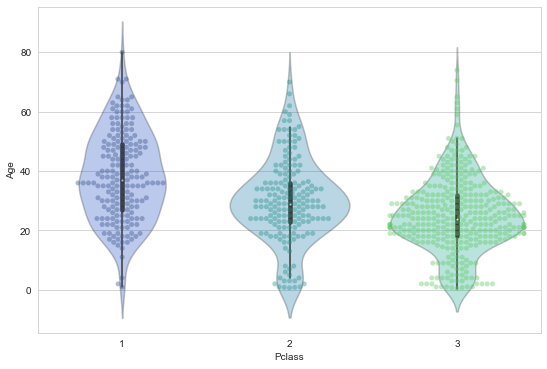

In [66]:
plt.figure(figsize=(9, 6))
sns.set_style('whitegrid')
#ax = sns.boxplot(x='Pclass', y='Age',data=train, notch=True)
ax = sns.violinplot(x='Pclass', y='Age',data=train, palette='winter')
for violin, alpha in zip(ax.collections[::2], [0.3,0.3,0.3]):
    violin.set_alpha(alpha)

ax = sns.swarmplot(x='Pclass', y='Age',data=train, alpha = 0.4, palette='viridis',dodge=True)

>> We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [76]:
print(train['Age'].isnull().sum())
#print(nanage)

177


> This is more acurate

In [107]:
train.groupby('Pclass')['Age'].mean().round(0).loc[1]

38.233440860215055

> But to match the model of the tutorial use this below

In [128]:
train.groupby('Pclass')['Age'].describe().iloc[0]['50%']

37.0

In [129]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return train.groupby('Pclass')['Age'].describe().iloc[0]['50%']

        elif Pclass == 2:
            return train.groupby('Pclass')['Age'].describe().iloc[1]['50%']

        else:
            return train.groupby('Pclass')['Age'].describe().iloc[2]['50%']

    else:
        return Age         

In [131]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

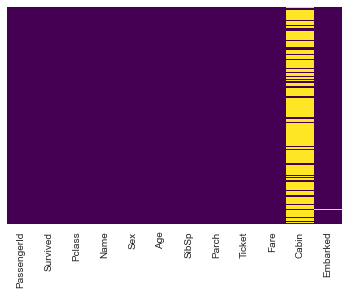

In [133]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

>> This methods below is far quicker at replacing NAN age values with mean ages for each class without the use of a fucntion

In [135]:
train['MyAge'] = train['Age'].fillna(train.groupby('Pclass')['Age'].transform('mean'))


In [140]:
data = train[['Age','MyAge']]
data.corr()

,Age,MyAge
Age,1.0,1.0
MyAge,1.0,1.0


In [143]:
train['Age'].corr(train['MyAge'])

0.9999999999999999

In [152]:
train['Age'].equals(train['MyAge'])

True

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [156]:
train[train["Cabin"].isnull()==True].shape[0]

687

In [157]:
train.drop('Cabin',axis=1,inplace=True)

In [158]:
train.dropna(inplace=True)

One last check there is no missing values

<AxesSubplot:>

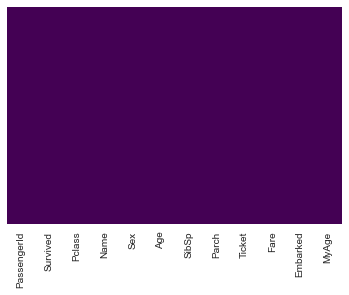

In [160]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<a id="t3.1."></a>
## 3.1. Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [159]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
 11  MyAge        889 non-null    float64
dtypes: float64(3), int64(5), object(4)
memory usage: 90.3+ KB


In [161]:
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


>> Issue with this output is there are two column for age - and these both are perfect predicotrs of each other - a ML analyses will struggle to deal with this due to Multicollinearity. We want to avoid Multicollinearity. "Multicollinearity does not reduce the predictive power or reliability of the model as a whole, at least within the sample data set; it only affects calculations regarding individual predictors. That is, a multiple regression model with correlated predictors can indicate how well the entire bundle of predictors predicts the outcome variable, but it may not give valid results about any individual predictor, or about which predictors are redundant with respect to others." 

Hence here we can drop the first column and we get oen vector which is binary indicator if person was male or not

In [163]:
pd.get_dummies(train['Sex'],drop_first=True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


Now we can apply this to some variables and do it for the embark column as well

In [168]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [172]:
train = pd.concat([train,sex,embark],axis=1)

In [173]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,MyAge,male,Q,S,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,22.0,1,0,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,38.0,0,0,0,0,0,0


> But now you see it has concatinated the new column but we want to remove the arbitrary columns that we just replaced with our new dummy coding varibales, i.e., the titles of those concatinated columns Sex and Embark

> While we are at it we can also drop Name and Ticket as we won't be using them in this analyses

In [174]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

- we use axis = 1 , because these are column we are removing not rows. And use inplace to perminantly remove them from the df

In [175]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,MyAge,male,Q,S,male,Q,S
0,1,0,3,22.0,1,0,7.2500,22.0,1,0,1,1,0,1
1,2,1,1,38.0,1,0,71.2833,38.0,0,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,26.0,0,0,1,0,0,1
3,4,1,1,35.0,1,0,53.1000,35.0,0,0,1,0,0,1
4,5,0,3,35.0,0,0,8.0500,35.0,1,0,1,1,0,1


In [179]:
train.drop('PassengerId',axis=1,inplace=True)

In [180]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,MyAge,male,Q,S,male,Q,S
0,0,3,22.0,1,0,7.2500,22.0,1,0,1,1,0,1
1,1,1,38.0,1,0,71.2833,38.0,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,26.0,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,35.0,0,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,35.0,1,0,1,1,0,1


Great! Our data is ready for our model!

<a id="t4."></a>
# 4. Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

<a id="t4.1."></a>
## 4.1. Train Test Split

In [176]:
from sklearn.model_selection import train_test_split

>> Note for the notebook I am going to use this 'train' variable as if it was all the data and then slit that into two sets - a train and test set.

- Y is the column you want to predict
- In the case is is going to be the 'Survived' column
- Therefore we want to drop the 'Survived' column from the x data

In [181]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

<a id="t4.2."></a>
## 4.2. Training and Predicting

In [182]:
from sklearn.linear_model import LogisticRegression

Next create an instance of the logreg model

In [188]:
logmodel = LogisticRegression(max_iter=10000)

Now train the model

In [189]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [190]:
predictions = logmodel.predict(X_test)

Let's move on to evaluate our model!

<a id="t4.3."></a>
## 4.3. Evaluation

We can check precision,recall,f1-score using classification report!

In [191]:
from sklearn.metrics import classification_report

In [192]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.68      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.83      0.82       267



In [193]:
from sklearn.metrics import confusion_matrix

In [194]:
confusion_matrix(y_test,predictions)

array([[150,  13],
       [ 33,  71]], dtype=int64)

In [206]:
from sklearn.metrics import ConfusionMatrixDisplay
import pylab as pl

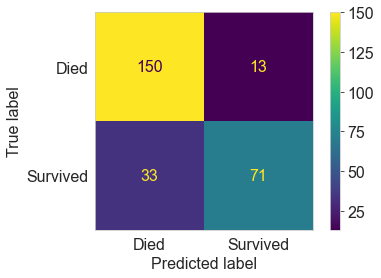

In [222]:
labels = ['Died', 'Survived']

ConfusionMatrixDisplay.from_predictions(y_test,predictions, display_labels=labels)
plt.grid(False)
plt.rcParams.update({'font.size': 16})

<a id="t5."></a>
# 5. Future Work. TODO

Not so bad! Might want to explore other feature engineering and the other titanic_text.csv file, some suggestions for feature engineering:

* Try grabbing the Title (Dr.,Mr.,Mrs,etc..) from the name as a feature
* Maybe the Cabin letter could be a feature
* Is there any info you can get from the ticket?

## FIN